## Implemenation of ANN using TensorFlow and Keras

In [1]:
# Importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
# Checking version of tensorflow and keras
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

Tensorflow version: 2.12.0
Keras version: 2.12.0


In [3]:
os.getcwd()

'/content'

## GPU/CPU check

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out)>0:
    print(f"{device} is available.")
    print(f"Details >> {out}")
  else:
    print(f"{device} is not available.")

GPU is available.
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available.
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Creating a simple classifier using Keras on MNIST data

In [10]:
mnist = tf.keras.datasets.mnist

In [11]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [12]:
(x_train_full, y_train_full),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [13]:
x_train_full.shape

(60000, 28, 28)

In [14]:
x_test.shape

(10000, 28, 28)

In [16]:
x_train_full[0].shape

(28, 28)

In [17]:
print(f"Data type of x_train_full: {x_train_full.dtype},\n shape of x_train_full: {x_train_full.shape}")

Data type of x_train_full: uint8,
 shape of x_train_full: (60000, 28, 28)


In [18]:
# Create a validation data set from full training data 
# Scale the data between 0 and 1 by dividing it by 255, as it's an unsigned data between 0-255 range
x_valid, x_train = x_train_full[:5000]/255. , x_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Scale the test set as well
x_test = x_test/255.

In [19]:
## Train - 55000
## Test - 10000
## Valid - 5000

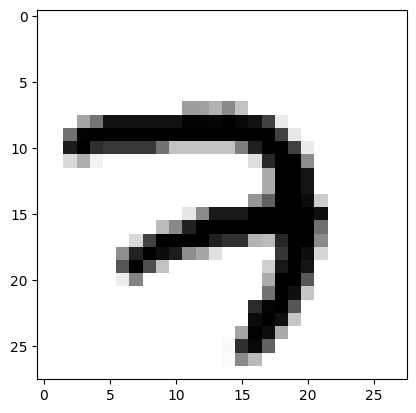

In [20]:
plt.imshow(x_train[0],cmap='binary')
plt.show()

<Axes: >

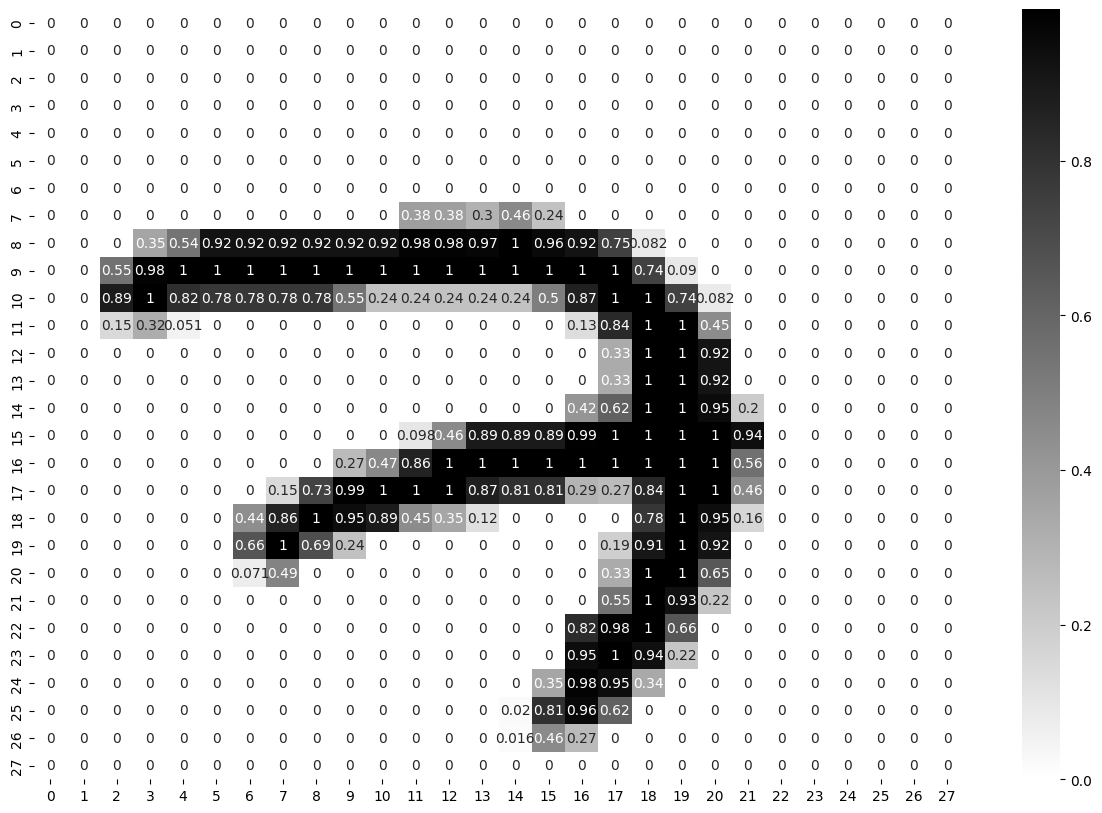

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(x_train[0],annot=True,cmap='binary')

In [23]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=(28,28), name='inputLayer'),
          tf.keras.layers.Dense(300, activation="relu",name='hiddenLayer1'),
          tf.keras.layers.Dense(100, activation="relu",name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax",name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [24]:
model_clf.layers

In [25]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [29]:
weights, bias = hidden1.get_weights()

In [30]:
weights.shape

(784, 300)

In [31]:
bias.shape

(300,)

In [32]:
print("shape\n",weights.shape,"\n")
weights

shape
 (784, 300) 



array([[ 0.02548999, -0.02360186,  0.0103756 , ...,  0.00207316,
        -0.00742818,  0.01315166],
       [-0.0601535 , -0.03108545,  0.01402656, ..., -0.04697102,
        -0.03715688,  0.03522552],
       [ 0.01106716, -0.05143245, -0.04073597, ..., -0.05971919,
         0.03526381, -0.04418797],
       ...,
       [-0.05346186, -0.04591802,  0.04563504, ..., -0.03054583,
        -0.06609174,  0.04672939],
       [-0.02486886,  0.04245324, -0.04984679, ...,  0.02391016,
         0.0412536 ,  0.00303085],
       [ 0.047206  , -0.04210607, -0.04771735, ...,  0.0202852 ,
         0.0482287 , -0.04754369]], dtype=float32)

In [34]:
print("shape\n",bias.shape,"\n")
bias

shape
 (300,) 



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"    # Use => tf.losses.cross_categorical_crossentropy
OPTIMIZER = "SGD"                                    # or use with custom learning rate=> tf.keras.optimizer.SGD(0.02)
METRICS = "accuracy"

model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [36]:
# training
EPOCHS = 30
VALIDATION_SET = (x_valid,y_valid)

history = model_clf.fit(x_train,y_train,epochs=EPOCHS,
                      validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 11s 4ms/step - loss: 0.6236 - accuracy: 0.8358 - val_loss: 0.3097 - val_accuracy: 0.9162
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2940 - accuracy: 0.9163 - val_loss: 0.2401 - val_accuracy: 0.9340
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2405 - accuracy: 0.9307 - val_loss: 0.2067 - val_accuracy: 0.9446
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2057 - accuracy: 0.9415 - val_loss: 0.1795 - val_accuracy: 0.9510
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1796 - accuracy: 0.9492 - val_loss: 0.1612 - val_accuracy: 0.9552
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1588 - accuracy: 0.9551 - val_loss: 0.1481 - val_accuracy: 0.9614
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1425 - accuracy: 0.9592 - val_loss: 0.1357 - val_accuracy

In [37]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [38]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.623641,0.835818,0.309661,0.9162
1,0.293965,0.916309,0.240105,0.9340
2,0.240469,0.930709,0.206667,0.9446
3,0.205654,0.941545,0.179545,0.9510
4,0.179606,0.949164,0.161242,0.9552
5,0.158797,0.955055,0.148148,0.9614
6,0.142510,0.959164,0.135673,0.9634
7,0.128438,0.963636,0.125936,0.9662
8,0.117098,0.966873,0.117696,0.9676
9,0.106935,0.969636,0.109617,0.9698


<Axes: >

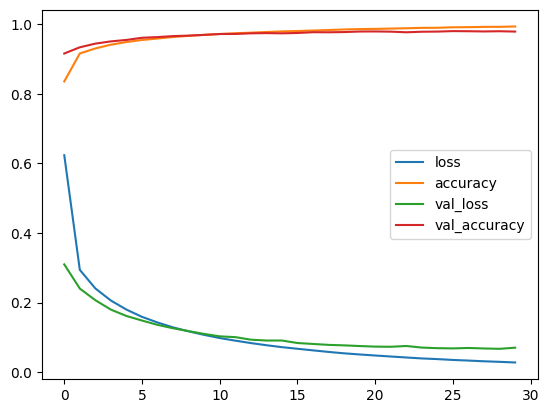

In [39]:
pd.DataFrame(history.history).plot()

In [40]:
model_clf.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0733 - accuracy: 0.9778


[0.07334297895431519, 0.9778000116348267]

## Sample Check - Test Data

In [41]:
x_new = x_test[:3]

In [42]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [43]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 89ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.001, 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.001, 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [45]:
y_pred = np.argmax(y_prob, axis=-1)
y_pred

array([7, 2, 1])

In [46]:
actual

array([7, 2, 1], dtype=uint8)

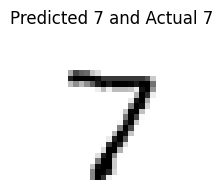

########################


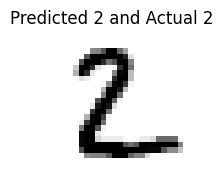

########################


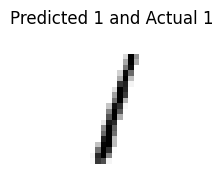

########################


In [50]:
# Plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.figure(figsize=(2,2))
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("########################")